In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
df = pd.read_csv('data/proposicoes_2013-2024_final.csv')
colunas = df.columns.tolist()

In [27]:
contagem_por_ano = df.groupby(['ano', 'VirouLei']).size().unstack()
contagem_por_ano['percentual'] = (contagem_por_ano[1] / (contagem_por_ano[0] + contagem_por_ano[1])) * 100
print(contagem_por_ano)

VirouLei     0    1  percentual
ano                            
2013       866   58    6.277056
2014       514   48    8.540925
2015      1335  121    8.310440
2016       858   68    7.343413
2017       765   75    8.928571
2018       493   42    7.850467
2019       491  116   19.110379
2020      1044   88    7.773852
2021       514   70   11.986301
2022       121   34   21.935484
2023       183   37   16.818182
2024         9   11   55.000000


### Testando com Random Under Sampling 
(redução da classe de dados majoritária: Não virou lei)

In [28]:
X = df[colunas[5:-2]]
y = df[colunas[-1]]

undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)

y_resampled.value_counts()


Oposição
0    2323
1    2323
Name: count, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

#criando camadas
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada e primeira camada oculta
model.add(Dense(5, activation='relu'))  # Segunda camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída (para classificação binária)

#compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/adriel/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5438 - loss: 0.6817 - val_accuracy: 0.6981 - val_loss: 0.6103
Epoch 2/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7178 - loss: 0.5912 - val_accuracy: 0.6981 - val_loss: 0.6059
Epoch 3/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7044 - loss: 0.5997 - val_accuracy: 0.6981 - val_loss: 0.6041
Epoch 4/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7101 - loss: 0.5909 - val_accuracy: 0.6981 - val_loss: 0.6032
Epoch 5/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7208 - loss: 0.5835 - val_accuracy: 0.6968 - val_loss: 0.6031
Epoch 6/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7069 - loss: 0.5961 - val_accuracy: 0.6981 - val_loss: 0.6037
Epoch 7/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7027 - loss: 0.5967 - val_accuracy: 0.6981 - val_loss: 0.6037
Epoch 8/50
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7140 - loss: 0.5892 - val_accuracy: 0.

In [19]:
help(history)

Help on History in module keras.src.callbacks.history object:

class History(keras.src.callbacks.callback.Callback)
 |  Callback that records events into a `History` object.
 |  
 |  This callback is automatically applied to
 |  every Keras model. The `History` object
 |  gets returned by the `fit()` method of models.
 |  
 |  Example:
 |  
 |  >>> model = Sequential([layers.Dense(10)])
 |  >>> model.compile(SGD(), loss='mse')
 |  >>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
 |  ...                     epochs=10, verbose=1)
 |  >>> print(history.params)
 |  {'verbose': 1, 'epochs': 10, 'steps': 1}
 |  >>> # check the keys of history object
 |  >>> print(history.history.keys())
 |  dict_keys(['loss'])
 |  
 |  Method resolution order:
 |      History
 |      keras.src.callbacks.callback.Callback
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  on_epoch_end

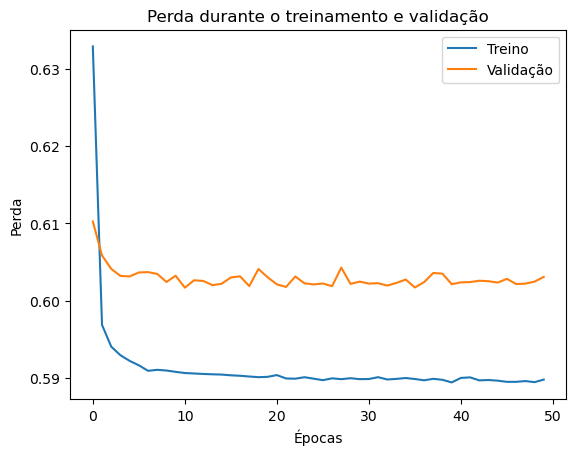

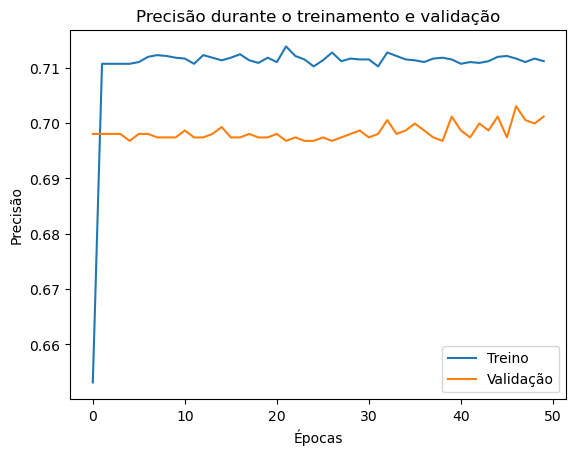

In [9]:
# Plotando as curvas de perda para identificar overfitting
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plotando as curvas de precisão para identificar overfitting
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Precisão durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()
plt.show()

In [17]:
y_test

6748    1
221     1
2945    0
4503    0
2463    1
       ..
6317    0
2603    0
5276    1
2664    0
7329    0
Name: Oposição, Length: 930, dtype: int64

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


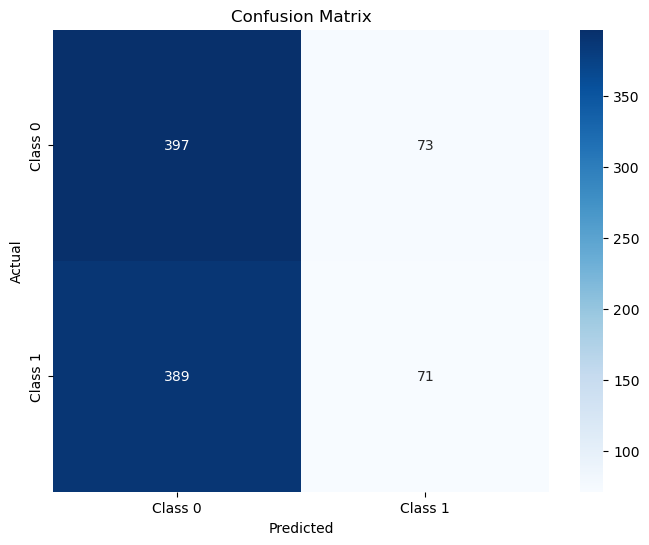

In [21]:
# Making predictions on the test set
import seaborn as sns


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusão desse primeiro teste:

- Perda e Precisão constante em tese deveria ser bom, mas nesse caso ta bom demais pra ser verdade. (Teve casos q rodei q ficavam constantes).
- Tem casos q a perda cai rapidamente ou a precisão aumenta rapidamente. Também pode ser overfitting.
- Provavelmente ta com overfitting de toda forma
- Precisamos ver cross-validation e regularização, i guess
- Acho q tem fazer validação com o undersampling tbm. Fazer batches com diferentes amostras de undersampling
- Talvez testar com Oversampling também?
- Talvez precisaremos utilizar Stratified K-Folds 
- Talvez fazer Ajuste de Peso da Classe
- Depois testar com a porcentagem dos partidos também